In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Импортируем датасет, поулченный ранее

In [28]:
df_tracks = pd.read_csv('tracks_spotify.csv')
df_tracks.head()

,Unnamed: 0,Unnamed: 0.1,name,duration,explicit,track number,countries,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,Born With A Beer In My Hand,188523.0,0.0,1.0,183.0,77.0,0.531,0.810,0.0,-5.475,1.0,0.0401,0.05020,0.000039,0.3570,0.608,148.026
1,1,1,Last Night,163854.0,1.0,2.0,183.0,89.0,0.492,0.675,6.0,-5.456,1.0,0.0389,0.46700,0.000000,0.1420,0.478,203.759
2,2,2,Everything I Love,187047.0,0.0,3.0,183.0,80.0,0.568,0.841,8.0,-3.802,1.0,0.0261,0.00514,0.000503,0.1470,0.668,103.983
3,3,3,Man Made A Bar (feat. Eric Church),191231.0,0.0,4.0,183.0,81.0,0.498,0.764,4.0,-5.006,1.0,0.0309,0.12300,0.000031,0.1190,0.489,147.984
4,4,4,Devil Don’t Know,205182.0,0.0,5.0,183.0,76.0,0.530,0.664,0.0,-5.648,1.0,0.0272,0.37700,0.000038,0.0937,0.323,125.002


Категориальных переменных в датасете нет, это хорошо, но часть признаков перед EDA предобработаем

In [29]:
df_tracks['explicit'] = (df_tracks['explicit'] == True)*1 #переводим в бинарную переменную

In [30]:
df_tracks.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True) #избавляемся от индексов

In [31]:
df_tracks['duration'] = df_tracks['duration']//1000 #переводим миллисекунды в секунды

В тетради Parser мы проверили, есть ли пропуски в таблице, поэтому на этом этапе она уже очищена от пустот.

Popularity - целевая переменная, которую мы будем потом пытаться предсказать, так что логично смотреть на визуализации с ней в первую очередь.

Сначала посмотрим на распределение песен по популярности, построим график плотности распределения:

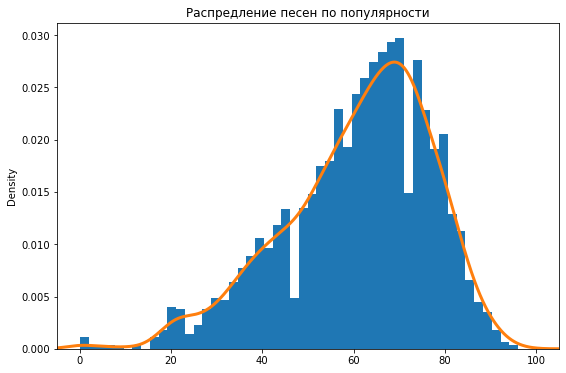

In [32]:
plt.figure(figsize = (9,6))
df_tracks.popularity.hist(bins=50, density=True);
df_tracks.popularity.plot(kind='kde', linewidth=3)
plt.title('Распредление песен по популярности')
plt.xlim((-5,105))
plt.show()

Можно заметить, что распределение песен по популярности напоминает нормальное с небольшим скосом вправо.

Теперь посмотрим на зависимость популярности от разных параметров:

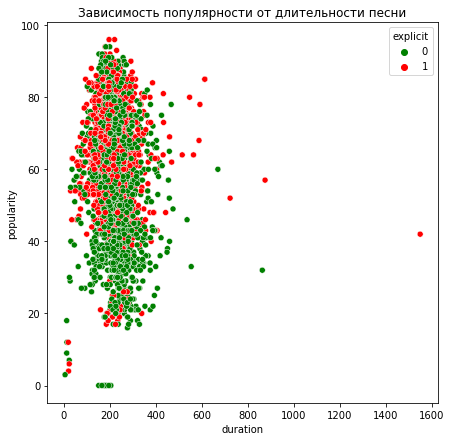

In [33]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'duration',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('Зависимость популярности от длительности песни')
plt.show()

Как видно из графика, есть выбросы, но так как в основном песни длятся 2-4 минуты, то проследить связь на данном графике проблематично. Рассмотрим песни, которые длятся до 400 секунд:

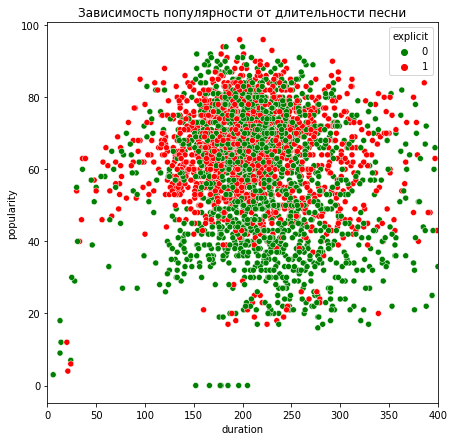

In [34]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'duration',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.xlim(0,400)
plt.title('Зависимость популярности от длительности песни')
plt.show()

Если же смотреть рассеивание песен длительностью до 7 минут, то можно удостовериться, что связи между длительностью песни и ее популярностью нет. В то же время можно заметить, что с ростом популярности, растет и количество explicit песен. Появляется гипотеза на проверку (о большей популярности песен с матами в них). \
Рассмотрим зависимость популярности от инструментальности песни:

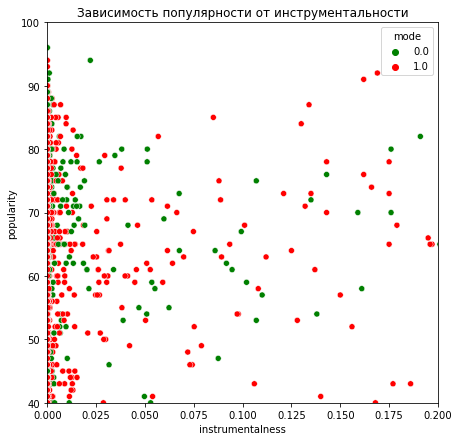

In [35]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'instrumentalness',
    y = 'popularity',
    hue = 'mode',
    palette = ['green','red']
)
plt.ylim(40,100)
plt.xlim(0.0, 0.2)
plt.title('Зависимость популярности от инструментальности');

Из диаграммы видно, что подавляющее большинство песен не являются инструментальными, а выделить зависимость в данных по данному признаку невозможно. Поэтому данный признак можно не учитывать, так как он незначителен.

In [36]:
df_tracks.drop('instrumentalness', axis = 1, inplace = True)

Рассмотрим взаимосвязь номера трека и популярности:

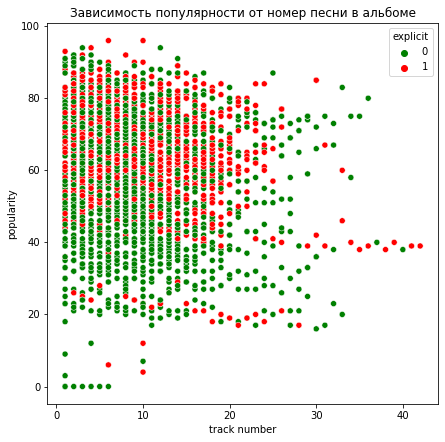

In [37]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'track number',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('Зависимость популярности от номер песни в альбоме')
plt.show()

Рассмотрим первые 15 треков(так как это среднее количество треков на альбомах) и наиболее популярные из них (те, у которых популярность больше 80):

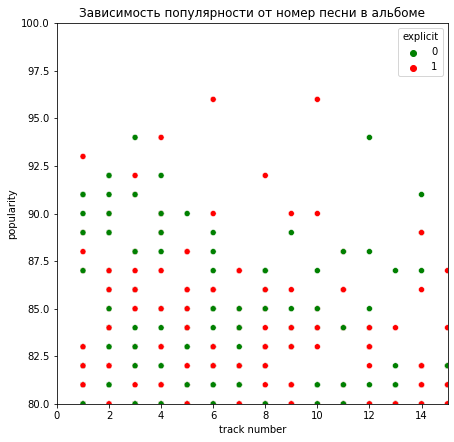

In [38]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'track number',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('Зависимость популярности от номер песни в альбоме')
plt.xlim(0, 15)
plt.ylim(80, 100)
plt.show()

Сложно сделать выводы о какой-либо зависимости, но незначительную отрицательную взаимосвязь можно просмотреть. Мы не беремся утвержать о наличии связи, вынесем эту гипотезу на проверку.

Рассмотрим, как взаимосвязаны два, по нашему мнению, похожих признака - танцевальность и позитивность (посмотрим и на диаграмму рассеивания, и на их индивидаульные распредления):

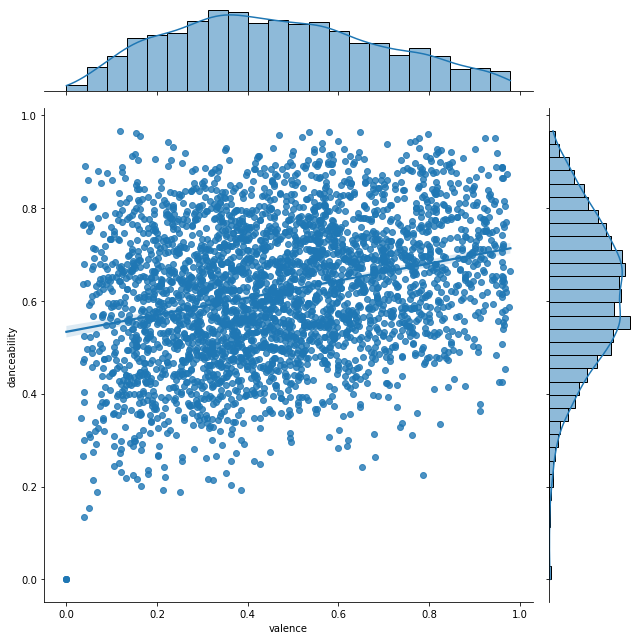

In [39]:
sns.jointplot(x="valence", y="danceability", data=df_tracks, kind="reg", height=9)

Как можно заметить, есть определенная прямая зависимость между Danceability и Valence, также их распределения похожи. Объединим данные признаки в один (перемножим их) и откинем изначальные признаки. 

In [40]:
df_tracks['dance-valence'] = df_tracks['danceability']*df_tracks['valence']
df_tracks = df_tracks.drop(['danceability', 'valence'], axis = 1)

Посмотрим, как новый признак влияет на популярность:

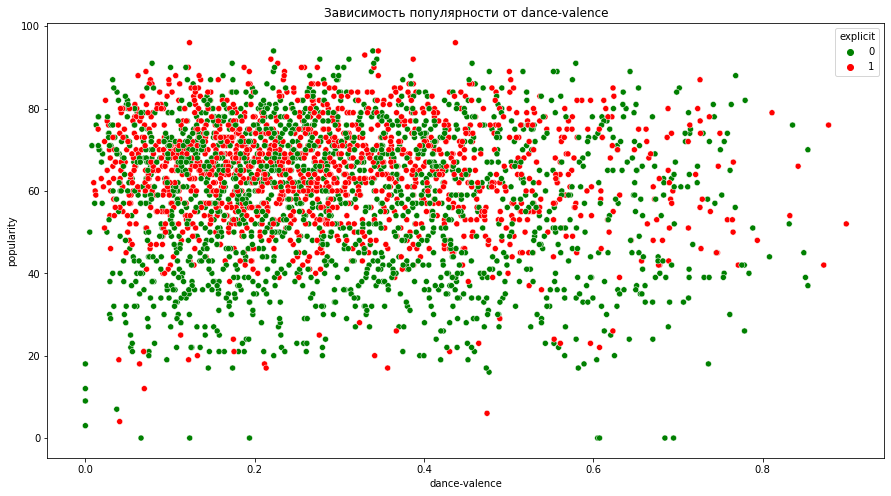

In [41]:
plt.figure(figsize = (15,8))
sns.scatterplot(
    data = df_tracks,
    x = 'dance-valence',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('Зависимость популярности от dance-valence');

Ярковыраженной зависимости не наблюдается, поскольку для большинства песен этот признак не велик. 

Рассмотрим признак Countries:

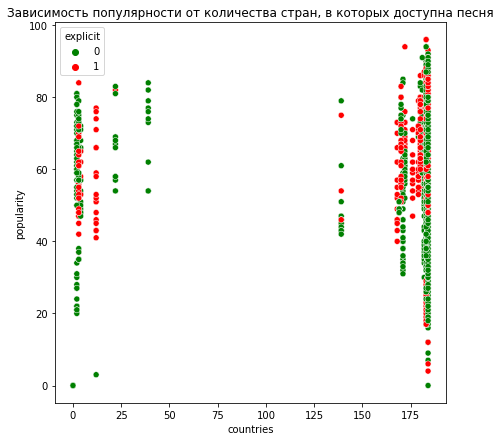

In [42]:
plt.figure(figsize = (7,7))
sns.scatterplot(
    data = df_tracks,
    x = 'countries',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('Зависимость популярности от количества стран, в которых доступна песня');

Зависимость популярности от страны не значима, так что избавимся от нее.

In [43]:
df_tracks.drop('countries', axis = 1, inplace = True)

Далее посмотрим на диаграммы рассеивания по разным признакам и будем так же отбрасывать незначимые признаки.

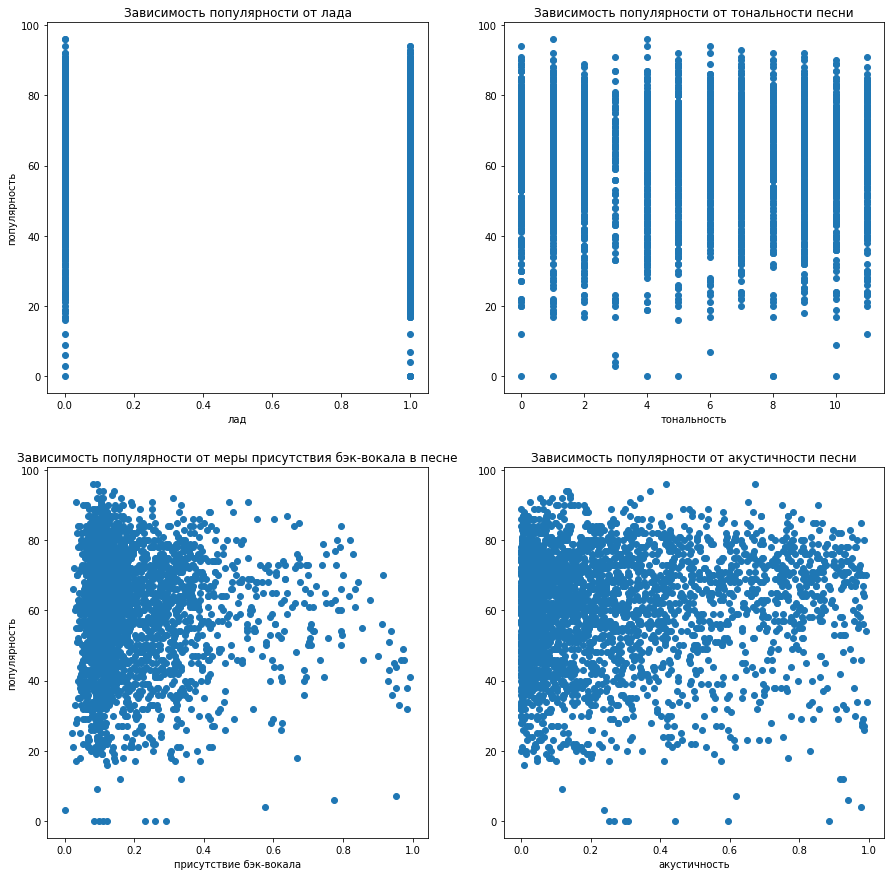

In [44]:
figure, axis = plt.subplots(2, 2, figsize = (15,15))
axis[0][0].scatter(
    data = df_tracks,
    x = 'mode',
    y = 'popularity'
)
axis[0][0].set_title('Зависимость популярности от лада')
axis[0][0].set_xlabel('лад')
axis[0][0].set_ylabel('популярность')
axis[0][1].scatter(
    data = df_tracks,
    x = 'key',
    y = 'popularity'
)
axis[0][1].set_title('Зависимость популярности от тональности песни')
axis[0][1].set_xlabel('тональность')
axis[1][0].scatter(
    data = df_tracks,
    x = 'liveness',
    y = 'popularity'
)
axis[1][0].set_title('Зависимость популярности от меры присутствия бэк-вокала в песне')
axis[1][0].set_xlabel('присутствие бэк-вокала')
axis[1][0].set_ylabel('популярность')
axis[1][1].scatter(
    data = df_tracks,
    x = 'acousticness',
    y = 'popularity'
)
axis[1][1].set_title('Зависимость популярности от акустичности песни')
axis[1][1].set_xlabel('акустичность');

По приведенным выше графикам видно, что признаки не значимы. Отбросим их.

In [45]:
df_tracks.drop(['acousticness','liveness','key','mode'],axis = 1, inplace = True)

Создадим новый признак - индикатор того, исполняется ли трек несколькими артистами или нет.

In [46]:
feature = []
for item in df_tracks.name.values: 
    if 'feat' in item.lower(): feature.append(1)
    else: feature.append(0)
df_tracks['feat'] = feature

В дальнейшем - проверим гипотезу о том, что популярность песен, которые поют несколько человек больше популярности сольных песен.

Итоговый датасет будет иметь вид:

In [47]:
df_tracks

,name,duration,explicit,track number,popularity,energy,loudness,speechiness,tempo,dance-valence,feat
0,Born With A Beer In My Hand,188.0,0,1.0,77.0,0.810,-5.475,0.0401,148.026,0.322848,0
1,Last Night,163.0,1,2.0,89.0,0.675,-5.456,0.0389,203.759,0.235176,0
2,Everything I Love,187.0,0,3.0,80.0,0.841,-3.802,0.0261,103.983,0.379424,0
3,Man Made A Bar (feat. Eric Church),191.0,0,4.0,81.0,0.764,-5.006,0.0309,147.984,0.243522,1
4,Devil Don’t Know,205.0,0,5.0,76.0,0.664,-5.648,0.0272,125.002,0.171190,0
...,...,...,...,...,...,...,...,...,...,...,...
3239,I Bet You Think About Me (feat. Chris Stapleto...,285.0,1,26.0,77.0,0.715,-4.516,0.0495,149.654,0.184943,1
3240,Forever Winter (Taylor's Version) (From The Va...,263.0,0,27.0,69.0,0.552,-5.828,0.0310,116.012,0.250510,0
3241,Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...,240.0,0,28.0,71.0,0.488,-6.918,0.0293,125.039,0.270230,1
3242,The Very First Night (Taylor's Version) (From ...,200.0,0,29.0,75.0,0.733,-5.025,0.0281,121.009,0.393918,0


Давайте посмотрим на корреляцию между признаками:

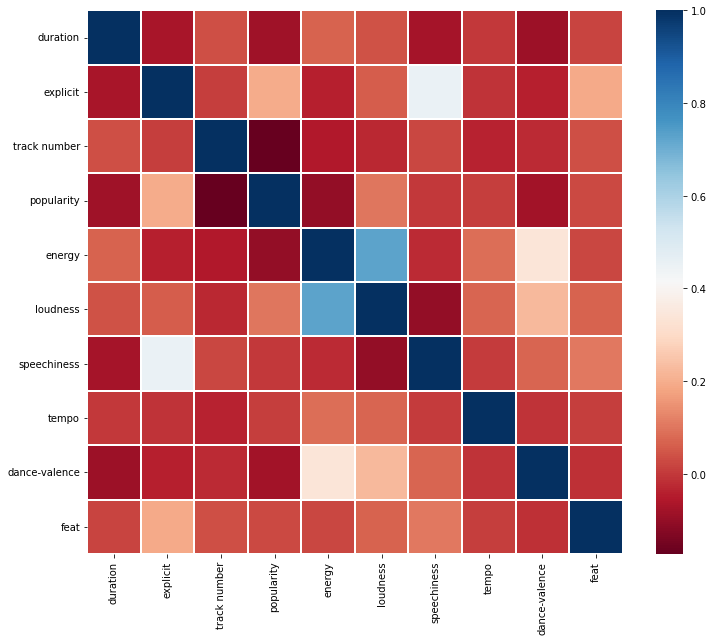

In [48]:
plt.figure(figsize = (12,10))
sns.heatmap(df_tracks.corr(), 
            cmap = 'RdBu',
            linewidths = 0.1,
)
plt.show();

Как показывает heatmap, высокой корреляцией также обладают признаки loudness и energy. Объединим их в один:

In [49]:
df_tracks['loud-energy'] = df_tracks.loudness * df_tracks.energy
df_tracks.drop(['loudness', 'energy'], axis = 1, inplace = True)

In [50]:
df_tracks.to_csv('df_tracks.csv')